# Tratamento dos dados usando o Sklearn

Feature engineering refere-se a um processo de seleção e transformação das variáveis independentes com o objetivo de construir um modelo preditivo usando aprendizado de máquina.

Qualquer pessoa pode simplesmente passar dados para os modelos do sklearn ou fazer automl, o diferencial está no tratamento que é feito nos dados

A ideia de que existem diferentes maneiras de representar atributos em um modelo, e que algumas dessas representações são melhores que outras, leva à ideia de feature engineering - o processo de criação de representações de dados que aumentam a eficácia de um modelo.

Observe que a eficácia do modelo é influenciada por muitas coisas. Obviamente, se o atributo não tem relação com o resultado, sua representação é irrelevante. No entanto, é muito importante perceber que há uma infinidade de tipos de modelos e que cada um tem suas próprias sensibilidades e necessidades. Por exemplo:

- Alguns modelos não podem tolerar multicolinearidade ou correlação entre atributos.
- Muitos modelos não podem usar amostras com valores ausentes.
- Alguns modelos são severamente comprometidos quando atributos irrelevantes estão nos dados.

A feature engineering e a seleção de variáveis ​​podem ajudar a mitigar muitos desses problemas.

## Processo de tratamento dos dados e modelagem

<img src="https://miro.medium.com/max/875/1*QRVI4dwzTN89P8awT8FC6A.png"  width=700>

## Etapas do pré-processamento dos dados

<img src="images/pre-processing_order.png" width=700>



- __Split:__ 
    - Train-test split
<br><br>

- __Cleaning:__
    - dropar columnas que não fazem sentido
    - remover duplicados
    - remover linhas baseado em algum critério de filtro
    - remover outliers
    - remover valores errados
    - mudar os datatypes (str, int, float)
    - marcar missings como NAN

**A etapa de limpeza dos dados deve vir antes de imputar valores missing e do one-hot-encoding**.

- __Imputing Missing Values:__ <br>
    - SimpleImputer (média, media, moda)
    - KNNImputer
    - IterativeImputer

__O Imputing deve ser feito ANTES do One-Hot-Encoding__ (tanto que ele não aceita valores nans).
<br>

- __Transform features:__ 
    - Features Categóricas: <br>
        - OrdinalEncoder <br>
        - LabelEncoder <br>
        - One-Hot-Encoding <br>
    - Features Numéricas:
        - Binarizer
        - KBinsDiscretizer
        - MinMaxScale
        - StandardScale
        - RobustScale
    
Os dados nans e tipos de colunas devem ter sido tratados antes desse processo.

- __Feature Engineering:__
    - PolynomialFeatures
    - PowerTransformer
    - Agregação de Features
<br>
<br>

- __Feature Selection:__
    - Univariate statistical tests
    - Recursive Feature Elimination (RFE)
    - Mutual_info_classif
    - Variance inflation factor (VIF)
<br><br>

- __Dimensionality Reduction:__

    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)
    - t-SNE


Na aula de hoje veremos as classes que fazem os pré-processamentos de Imputing Missing Values, Transform features e Feature Engineering. Feature Selection e Dimensionality Reduction ficarão para outra aula.

A partir de agora denominaremos essas classes de `Transformers` adiantando um conceito que será importante em na aula de pipelines. A ideia desses métodos é transformar nossos dados para tanto permitir que consigamos utilizar essas informações nos modelos quanto para melhorar a asservidade do mesmo.

### Atenção
__Diego Morais: só lembrar que fit é coisa de crossfiteiro e tem relação com treino__

É **muito importante** que os transformers sejam fitados **com os dados de treino**, para que informações da base de teste não sejam utilizadas no treinamento (conceito conhecido como [data leakage](https://machinelearningmastery.com/data-preparation-without-data-leakage/)).

Por isso, sempre siga o seguinte passo-a-passo par aplicação de transformers:

- Primeiro, faça o train test split;
- Use o `.fit_transform()` nos dados de **treino**;
- Use o `.transform()` pra transformar os dados de teste -- com o **mesmo transformer treinado** com os dados de treino;

In [8]:
# Imports gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados Faltantes
<img src="images/pre-processing_order.png" width=600>

- <font size=4><b>SimpleImputer</b></font>

O [__SimpleImputer__](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) do módulo `sklearn.impute` executa estratégias para lidar com __valores númericos faltantes__.<br><br>
Estratégias  de imputação disponíveis:

- “mean”, substitui valores ausentes usando a média ao longo de cada coluna. Só pode ser usado com dados numéricos.
- “median”, substitui valores ausentes usando a mediana ao longo de cada coluna. Só pode ser usado com dados numéricos.
- “most_frequent”, substitui missing usando o valor mais frequente ao longo de cada coluna. Pode ser usado com strings ou dados numéricos. Se houver mais de um valor, somente o menor será retornado.
- "constant", substitui valores ausentes por fill_value. Pode ser usado com strings ou dados numéricos.



In [9]:
from sklearn.impute import SimpleImputer

In [11]:
# Mean
# Vamos criar dados numéricos como exemplo. 
X = np.array([[-1.0], 
              [-0.5], 
              [np.nan], 
              [0.5], 
              [1.0]])

# Instanciando o encoder.
imputer = SimpleImputer(strategy='median')

# Treinando o encoder e transformando os dados de entrada.
X_impt = imputer.fit_transform(X)

# Mostrando o resultado.
print(X_impt)
print(' ')
print(imputer.statistics_)

[[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]]
 
[0.]


In [13]:
# Constant
X = np.array([[-1.0], 
              [-0.5], 
              [np.nan], 
              [0.5], 
              [np.nan]])

# Instanciando o encoder.
imputer = SimpleImputer(strategy='constant', fill_value=99)

# Treinando o encoder e transformando os dados de entrada.
X_impt = imputer.fit_transform(X)

# Mostrando o resultado.
print(X_impt)
print(' ')
print(imputer.statistics_)

[[-1. ]
 [-0.5]
 [99. ]
 [ 0.5]
 [99. ]]
 
[99.]


- <font size=4><b>[KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)</b></font>

<br>
Os valores ausentes de cada amostra são imputados usando o valor médio de n_vizinhos mais próximos encontrados no conjunto de treinamento. Duas amostras estão próximas se as features que não estão faltando estiverem próximos.


In [14]:
import numpy as np
from sklearn.impute import KNNImputer
X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
imputer = KNNImputer(n_neighbors=2)
print("Antes:\n", X)
print("\nDepois:\n")
imputer.fit_transform(X)

Antes:
 [[ 1.  2. nan]
 [ 3.  4.  3.]
 [nan  6.  5.]
 [ 8.  8.  7.]]

Depois:



array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

- <font size=4><b>[IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)</b></font> <br> <br>
Modela cada feature com valores ausentes em função de outras features e usa essa estimativa para imputação. Ele faz isso de maneira iterativa: em cada etapa, uma coluna de feature é designada como saída (y) e as outras colunas de features são tratadas como entradas (X). Um regressor é ajustado em (X, y) para y conhecido. Em seguida, o regressor é usado para prever os valores ausentes de y. Isso é feito para cada feature de maneira iterativa e, em seguida, repetido para rodadas de imputação max_iter. Os resultados da rodada de imputação final são retornados.

In [15]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
X_nan = np.array([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X = imp.fit_transform(X_nan)

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print("Antes:\n", X_nan)
print("\n\nDepois:\n", X)
print("\n\nX_test:\n")
print(np.round(imp.transform(X_test)))

Antes:
 [[ 1.  2.]
 [ 3.  6.]
 [ 4.  8.]
 [nan  3.]
 [ 7. nan]]


Depois:
 [[ 1.          2.        ]
 [ 3.          6.        ]
 [ 4.          8.        ]
 [ 1.50004509  3.        ]
 [ 7.         14.00004135]]


X_test:

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


# Transform Features: Dados Categóricos
<img src="images/pre-processing_order.png" width=600>

No módulo 3, aprendemos como numerizar features categóricas usando o `pd.get_dummies()`, bem como usando o `.astype("category").cat.codes`.

Agora, com o objetivo de incluir essas estratégias de pré-processamento no pipeline, é importante que também usemos o sklearn pra fazer isso!

As classes relevantes são:

- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) - faz o ordinal encoding das features.
- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder) - encoding para o label
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) - faz o one-hot encoding das features;



#### OrdinalEncoder e LabelEncoder
Transformam as categorias em números sequenciais em uma mesma coluna. Em ambos casos a ordenação é feita alfabeticamente, se temos uma ordem definida que queremos seguir só poderemos utilizar o OrdinalEncoder e precisamos passar um array com a ordem esperada.


<img src="https://i.imgur.com/tEogUAr.png" width=1000>

Mas qual a diferença entre os dois?

- `OrdinalEncoder` é para dados 2D com shape (n_samples, n_features) e por isso é utilizado na transformação de features;
- `LabelEncoder` é para dados 1D com shape (n_samples,) e por isso é utilizado na transformação do label

Outra diferença entre eles é o nome do learned parameter;

- `LabelEncoder`  learns `classes_`
- `OrdinalEncoder` learns `categories_`

Vamos considerar um exemplo bem simples em que temos a área em km^2 de cidades da França e queremos prever se são cidades boas de se morar.

In [16]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [17]:
# Pegando cidades, regiões e suas respectivas áreas (em km^2) da França 
X = np.array([['Paris', 'Île-de-France', 105.4],
              ['Yvelines', 'Île-de-France', 2284.0],
              ['Grenoble', 'Auvergne-Rhône-Alpes', 18.13],
              ['Lyon Metropolis', 'Auvergne-Rhône-Alpes', 533.68]])

# Quais parecem legais, quais parecem chatas
y = ['uncool', 'cool', 'uncool', 'cool']

# Instanciando os encoders
feature_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

# Treinando os encoders já transformando os dados.
# No caso, a área das cidades não é categórico, então retiramos antes do fit_transform..
X_encoded = feature_encoder.fit_transform(X[:,:2])
y_encoded = label_encoder.fit_transform(y)


In [18]:
# Antes
print("X:\n", X)

# Como ficou o resultado?
print("\n\nX_encoded:\n", X_encoded)
print("\ncategories: ", feature_encoder.categories_)

# Como ficou o resultado?
print("\n\ny_encoded: \n", y_encoded)
print("\nclasses: ", label_encoder.classes_)

X:
 [['Paris' 'Île-de-France' '105.4']
 ['Yvelines' 'Île-de-France' '2284.0']
 ['Grenoble' 'Auvergne-Rhône-Alpes' '18.13']
 ['Lyon Metropolis' 'Auvergne-Rhône-Alpes' '533.68']]


X_encoded:
 [[2. 1.]
 [3. 1.]
 [0. 0.]
 [1. 0.]]

categories:  [array(['Grenoble', 'Lyon Metropolis', 'Paris', 'Yvelines'], dtype='<U32'), array(['Auvergne-Rhône-Alpes', 'Île-de-France'], dtype='<U32')]


y_encoded: 
 [1 0 1 0]

classes:  ['cool' 'uncool']


In [7]:
# Para passar uma determinada ordem ao OrdinalEncoder:
OrdinalEncoder(categories=[['cold','warm','hot']])\
    .fit_transform([['hot'],['warm'],['warm'],['cold']])\
    .reshape((1,-1))[0]

array([2., 1., 1., 0.])

- <font size=4><b>[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder)</b></font> <br>
Transforma cada uma das categorias em binários em colunas distintas.

<img src="https://i.imgur.com/TW5m0aJ.png" width=1000>

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Vamos pegar uma coluna de dados categóricos como exemplo. 
X = np.array([['abacate'], 
              ['Irmão do Jorel'], 
              ['Vovó Juju'], 
              ['Vovó Juju'], 
              ['Irmão do Jorel']])

# Instanciando o encoder.
dummy_encoder = OneHotEncoder() 

# Treinando o encoder e transformando os dados de entrada.
X_onehot = dummy_encoder.fit_transform(X)#.toarray()

# Mostrando o resultado.
print(X_onehot)
print(' ')
print(dummy_encoder.categories_) # Observe que ele tb ordena o vetor seguindo a tabela ASCII

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
 
[array(['Irmão do Jorel', 'Vovó Juju', 'abacate'], dtype='<U14')]


O OneHotEncoder retorna por padrão uma matriz esparsa do scipy:

In [21]:
print(type(X_onehot))

<class 'scipy.sparse.csr.csr_matrix'>


Uma "matriz esparsa" é apenas uma outra forma de escrever uma matriz. Dentro do parêntesis a gente escreve as posições (linha, coluna) onde o valor não é zero, e fora do parêntesis qual o valor que foi atribuído. Exemplo: <br>
(0, 2)      1.0 <br>
Na linha zero e coluna 2 foi atribuído o valor 1.

Para obter um numpy array ao invés de uma matriz esparsa podemos passar o parâmetro `sparse=False` ao instanciar o encoder ou fazer essa conversão aplicando `X_onehot.toarray()`.

Além disso, e se quisermos jogar uma coluna fora depois do OneHotEncoding? Também tem um parâmetro pra isso: `drop='first'`.
Atenção ao usar drop='first' -> olhar documentação

In [6]:
# Vamos pegar uma coluna de dados categóricos como exemplo. 
X = np.array([['abacate'], 
              ['Irmão do Jorel'], 
              ['Vovó Juju'], 
              ['Vovó Juju'], 
              ['Irmão do Jorel']])

# Instanciando o encoder.
dummy_encoder = OneHotEncoder(drop='first', sparse=False)

# Treinando o encoder e transformando os dados de entrada.
X_onehot = dummy_encoder.fit_transform(X)

# Mostrando o resultado.
print(X_onehot)
print(' ')
print(dummy_encoder.categories_)


[[0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]]
 
[array(['Irmão do Jorel', 'Vovó Juju', 'abacate'], dtype='<U14')]


# Transform Features: Dados Numéricos
Atributos contínuos estão sujeitos a problemas no processo de modelagem. Por exemplo, modelos que constroem relacionamentos entre os atributos e a saída baseados na ordenação dos valores dos atributos em vez do valor real, como árvores, são imunes a distribuições de features distorcidas ou a amostras individuais que possuem valores incomuns (outliers). Outros modelos, como KNN e SVM, são muito mais sensíveis a features com distribuições distorcidas ou discrepantes.

Problemas comuns:

- Features com escalas muito diferentes.
- Features com uma distribuição assimétrica onde uma pequena proporção de amostras são ordens de magnitude maiores que a maioria dos dados.
- Dados com valores extremos (outliers).
- Conter informações relevantes e excessivamente redundantes. Ou seja, as informações coletadas podem ser representadas de forma mais eficaz e eficiente com um número menor e consolidado de novos atributos.


## Scale
Escalar geralmente significa alterar o intervalo dos valores. A forma da distribuição não muda. Pense em como uma maquete em escala de um edifício tem as mesmas proporções que o original, apenas menor. É por isso que dizemos que é desenhado em escala.
<br> <br>
Para alguns modelos de ML essa etapa de scaling é essencial:
- linear and logistic regression
- KNN
- neural networks (NN)
- support vector machines with radial bias kernel functions (SVM)
- principal components analysis (PCA)
- linear discriminant analysis (LDA)

- <font size=4><b>[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)</b></font>: 
Média 0 e std 1 <br>

$$\frac{x_i - mean(x)}{std(x)}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Vamos criar dados numéricos como exemplo.
X = np.array([[-1.0], 
              [-0.5], 
              [0.], 
              [0.5], 
              [1.0]])

# Instanciando o encoder.
standard_scaler = StandardScaler()

# Treinando o encoder e transformando os dados de entrada.
X_std = standard_scaler.fit_transform(X)

# Mostrando o resultado.
print(X_std)
print(' ')
print(standard_scaler.mean_, standard_scaler.scale_)

- <font size=4><b>[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)</b></font>: valores variam entre 0 e 1 ou -1 e 1 se no dataset tiver valores negativos

<br>

$$\frac{x_i - min(x)}{max(x)-min(x)}$$

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Vamos criar dados numéricos como exemplo. 
X = np.array([[-1.0], 
              [-0.5], 
              [0.], 
              [0.5], 
              [1.0]])

# Instanciando o encoder.
minmax_scaler = MinMaxScaler()

# Treinando o encoder e transformando os dados de entrada.
X_minmax = minmax_scaler.fit_transform(X)

# Mostrando o resultado.
print(X_minmax)
print(' ')
print(minmax_scaler.data_min_, minmax_scaler.data_max_)

Ao instanciar a classe podemos definir quais valores queremos como mínimo e máximo passando uma tupla ao parâmetro `feature_range(min, max)`:

In [ ]:
# Vamos criar dados numéricos como exemplo. 
X = np.array([[-1.0], 
              [-0.5], 
              [0.], 
              [0.5], 
              [1.0]])

# Instanciando o encoder.
minmax_scaler = MinMaxScaler(feature_range=(-3,4))

# Treinando o encoder e transformando os dados de entrada.
X_minmax = minmax_scaler.fit_transform(X)

# Mostrando o resultado.
print(X_minmax)
print(' ')
print(minmax_scaler.data_min_, minmax_scaler.data_max_)

Na presença de outliers, tanto o __StandardScale__ quanto o __MinMaxScale__ geram o encolhimento no intervalo dos valores.
<br>
<br>
- <font size=4><b>[RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)</b></font>: escala os dados usando os IQR
<br>
$$\frac{x_i - Q_1(x)}{Q_3(x)-Q_1(x)}$$

In [15]:
from sklearn.preprocessing import RobustScaler

# Vamos criar dados numéricos como exemplo. 
X = np.array([[-100.0], 
              [-0.5], 
              [0.], 
              [0.5], 
              [1.0],
              [2],
              [7],
              [1],
              [-0.3],
              [-0.4]])

# Instanciando o encoder.
rs = RobustScaler()

# Treinando o encoder e transformando os dados de entrada.
X_rs = rs.fit_transform(X)

# Mostrando o resultado.
print(X_rs)
print(' ')
# print(minmax_scaler.data_min_, minmax_scaler.data_max_)


[[-72.90909091]
 [ -0.54545455]
 [ -0.18181818]
 [  0.18181818]
 [  0.54545455]
 [  1.27272727]
 [  4.90909091]
 [  0.54545455]
 [ -0.4       ]
 [ -0.47272727]]
 


#### Comparando os scales

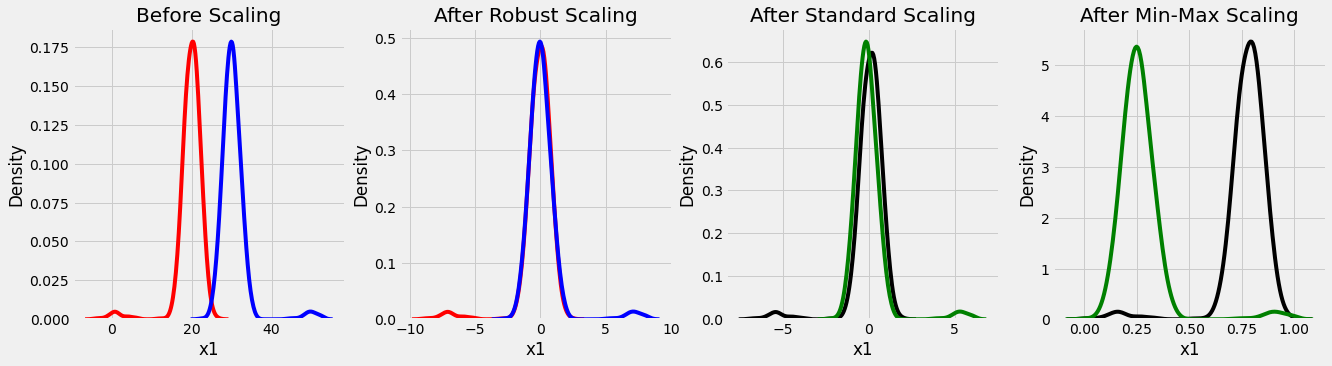

In [27]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('fivethirtyeight')

# Cria duas features, x1 e x2, com a primeira tendo outliers à esquerda e a segunda outliers à direita
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')

plt.show()

# Fonte: https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/


Scikit-learn Function |	Range | Mean | When Use | Definition | Notes
----------------------|-------|------|----------|------------|-------
MinMaxScaler | 0 to 1 default, can override	| varies | When want a light touch. | Subtracts the mimimum value in the column and then divides by the difference between the original maximum and original minimum. | Preserves the shape of the original distribution. Doesn't reduce the importance of outliers. Least disruptive to the information in the original data.
RobustScaler |	varies | varies | Use if have outliers and don't want them to have much influence. 	| Standardizes a feature by removing the median and dividing each feature by the interquartile range. | Outliers have less influence than with MinMaxScaler. Range is larger than MinMaxScaler or StandardScaler.
StandardScaler | varies |0| When need features with zero mean and unit standard deviation | Standardizes a feature by removing the mean and dividing each value by the standard deviation.  | Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). If you have outliers in your feature, using this will scale most of the data to a small interval. 

<br>
https://docs.google.com/spreadsheets/d/1woVi7wq13628HJ-tN6ApaRGVZ85OdmHsDBKLAf5ylaQ/edit#gid=0


## Discretização
Discretização, também conhecida como categorização ou binning, é o processo de traduzir uma __variável quantitativa__ em um conjunto de dois ou mais buckets __qualitativos__ (ou seja, categorias). Por exemplo, uma variável pode ser traduzida em quantis; os buckets seriam para saber se os números caíram nos primeiros 25% dos dados, entre o 25º e a mediana, etc. Nesse caso, haveria quatro valores distintos da versão bined dos dados.

- <font size=4><b>[Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html?highlight=binarizer#sklearn.preprocessing.Binarizer)</b></font> <br>
Transformar valores para 0 ou 1 de acordo com um limite.
<br>
Valores maiores que o limite são mapeados para 1, enquanto valores menores ou iguais ao limite são mapeados para 0. Com o limite padrão de 0, somente valores positivos são mapeados para 1.

In [55]:
from sklearn.preprocessing import Binarizer

In [56]:
# Vamos criar dados numéricos como exemplo.
X = np.array([[-1.0], 
              [0.75], 
              [0.99], 
              [1.01], 
              [1.76],
              [2.97]])

# Instanciando o encoder.
binarizador = Binarizer(threshold=1.5)

# Treinando o encoder e transformando os dados de entrada.
X_binary = binarizador.fit_transform(X)

# Mostrando o resultado.
print(X_binary)
print(' ')
print(binarizador.threshold)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]
 
1.5


- <font size=4><b>[KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html?highlight=kbinsdiscretizer#sklearn.preprocessing.KBinsDiscretizer)</b></font> <br>
Converte dados contínuos em k grupos e já aplica um encoding (ordinal ou one-hot)

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

In [29]:
# Vamos criar dados numéricos como exemplo.
X = np.array([[-1.0], 
              [0.75], 
              [0.99], 
              [1.01], 
              [1.76],
              [2.97]])

# Instanciando o encoder.
k_binarizador = KBinsDiscretizer(n_bins=3, encode='onehot-dense')

# Treinando o encoder e transformando os dados de entrada.
X_multiclass = k_binarizador.fit_transform(X)

# Mostrando o resultado.
print(X_multiclass)
print(' ')
print(k_binarizador.n_bins)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
 
3


- <font size=4><b>[Usando Decision Tree](https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b)</b></font> <br>

# Feature Engineering
<img src="images/pre-processing_order.png" width=600>

- <font size=4><b>[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=from%20sklearn%20preprocessing%20import%20polynomialfeatures)</b></font>
<br><br>

Gera uma nova matriz de features consistindo de todas as combinações polinomiais das features com grau menor e igual ao grau especificado. Por exemplo, se uma amostra de entrada é bidimensional e da forma $[a, b]$, os recursos polinomiais de grau 2 são $[1, a, b, a^2, ab, b^2]$.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# Vamos criar dados numéricos como exemplo. 
X = np.array([[-3.0],
              [-2.0], 
              [-1.0], 
              [0.0], 
              [1.0], 
              [2.0],
              [3.0]])

# Instanciando o encoder.
cubic = PolynomialFeatures(degree=3)

# Treinando o encoder e transformando os dados de entrada.
X_square = cubic.fit_transform(X)

# Mostrando o resultado.
print(X_square)
print(' ')
print(cubic.degree)

[[  1.  -3.   9. -27.]
 [  1.  -2.   4.  -8.]
 [  1.  -1.   1.  -1.]
 [  1.   0.   0.   0.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]]
 
3


- <font size=4><b>[PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)</b></font>
<br><br>
Aplica uma transformação de potência para tornar os dados mais Gaussianos.

Transformações de potência são uma família de transformações paramétricas e monotônicas que são aplicadas para tornar os dados mais gaussianos e com isso estabilizar a variância e minimizar a assimetria.. Isso é útil para modelar problemas relacionados à heterocedasticidade (variância não constante) ou outras situações em que a normalidade é desejada.

Atualmente, o PowerTransformer suporta a transformação Box-Cox e a transformação Yeo-Johnson. O parâmetro $\lambda$ ideal para estabilizar a variância e minimizar a assimetria é estimado através da máxima verossimilhança.

<img align="center" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkHjrl213TAXMJVBHK3yVaRLxxi-_dUqPJxg&usqp=CAU">

Neste procedimento, $\lambda$ é estimado a partir dos dados. Como o parâmetro de interesse está no expoente, esse tipo de transformação é chamado de transformação de potência. Alguns valores de $\lambda$ mapeiam para transformações comuns, como:
-  $\lambda=1$ (sem transformação),
- $\lambda=0$ (log),
- $\lambda=0.5$ (raiz quadrada) e 
- $\lambda=-1$ (inverso).

Como você pode ver, a transformação Box-Cox é bastante flexível em sua capacidade de lidar com muitas distribuições de dados diferentes.

O **Box-Cox** exige que os **dados de entrada sejam estritamente positivos**, enquanto o **Yeo-Johnson suporta dados positivos ou negativos**.

Essas duas transformações não são supervisionadas, pois, nesta aplicação, o resultado não é usado nos cálculos. Embora a transformação possa melhorar a distribuição de atributos, não há garantia de melhorar o modelo. No entanto, há uma variedade de modelos paramétricos que utilizam cálculos polinomiais nos dados de atributos, como a maioria dos modelos lineares, redes neurais e SVM. Nessas situações, uma distribuição de atributos distorcida pode ter um efeito prejudicial sobre esses modelos, uma vez que as caudas da distribuição podem dominar os cálculos subjacentes.


In [30]:
df = pd.read_csv("../data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


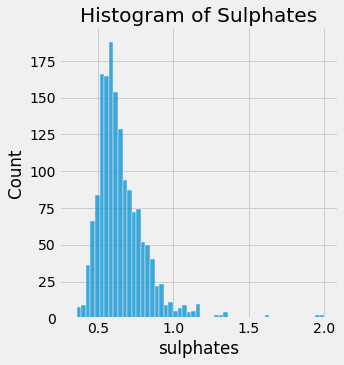

In [ ]:
sns.displot(df, x = 'sulphates').set(title = 'Histogram of Sulphates')

In [31]:
from sklearn.preprocessing import PowerTransformer

# Yoe-Johnson Transformation 
pt = PowerTransformer(method = 'yeo-johnson')
x_yj = pt.fit_transform(df[['sulphates']])
print(f"Valor do Lambda : {pt.lambdas_}")

Valor do Lambda : [-4.03103354]


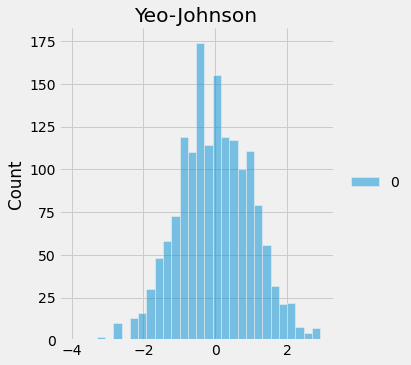

In [32]:
sns.displot(x_yj).set(title = 'Yeo-Johnson')

Valor do Lambda : -1.06


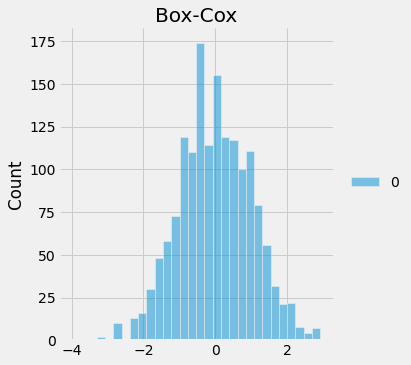

In [33]:
# Box-Cox Transformation 
pt = PowerTransformer(method = 'box-cox')
x_bc = pt.fit_transform(df[['sulphates']])
print(f"Valor do Lambda : {pt.lambdas_[0]:.2f}")
sns.displot(x_yj).set(title = f'Box-Cox')

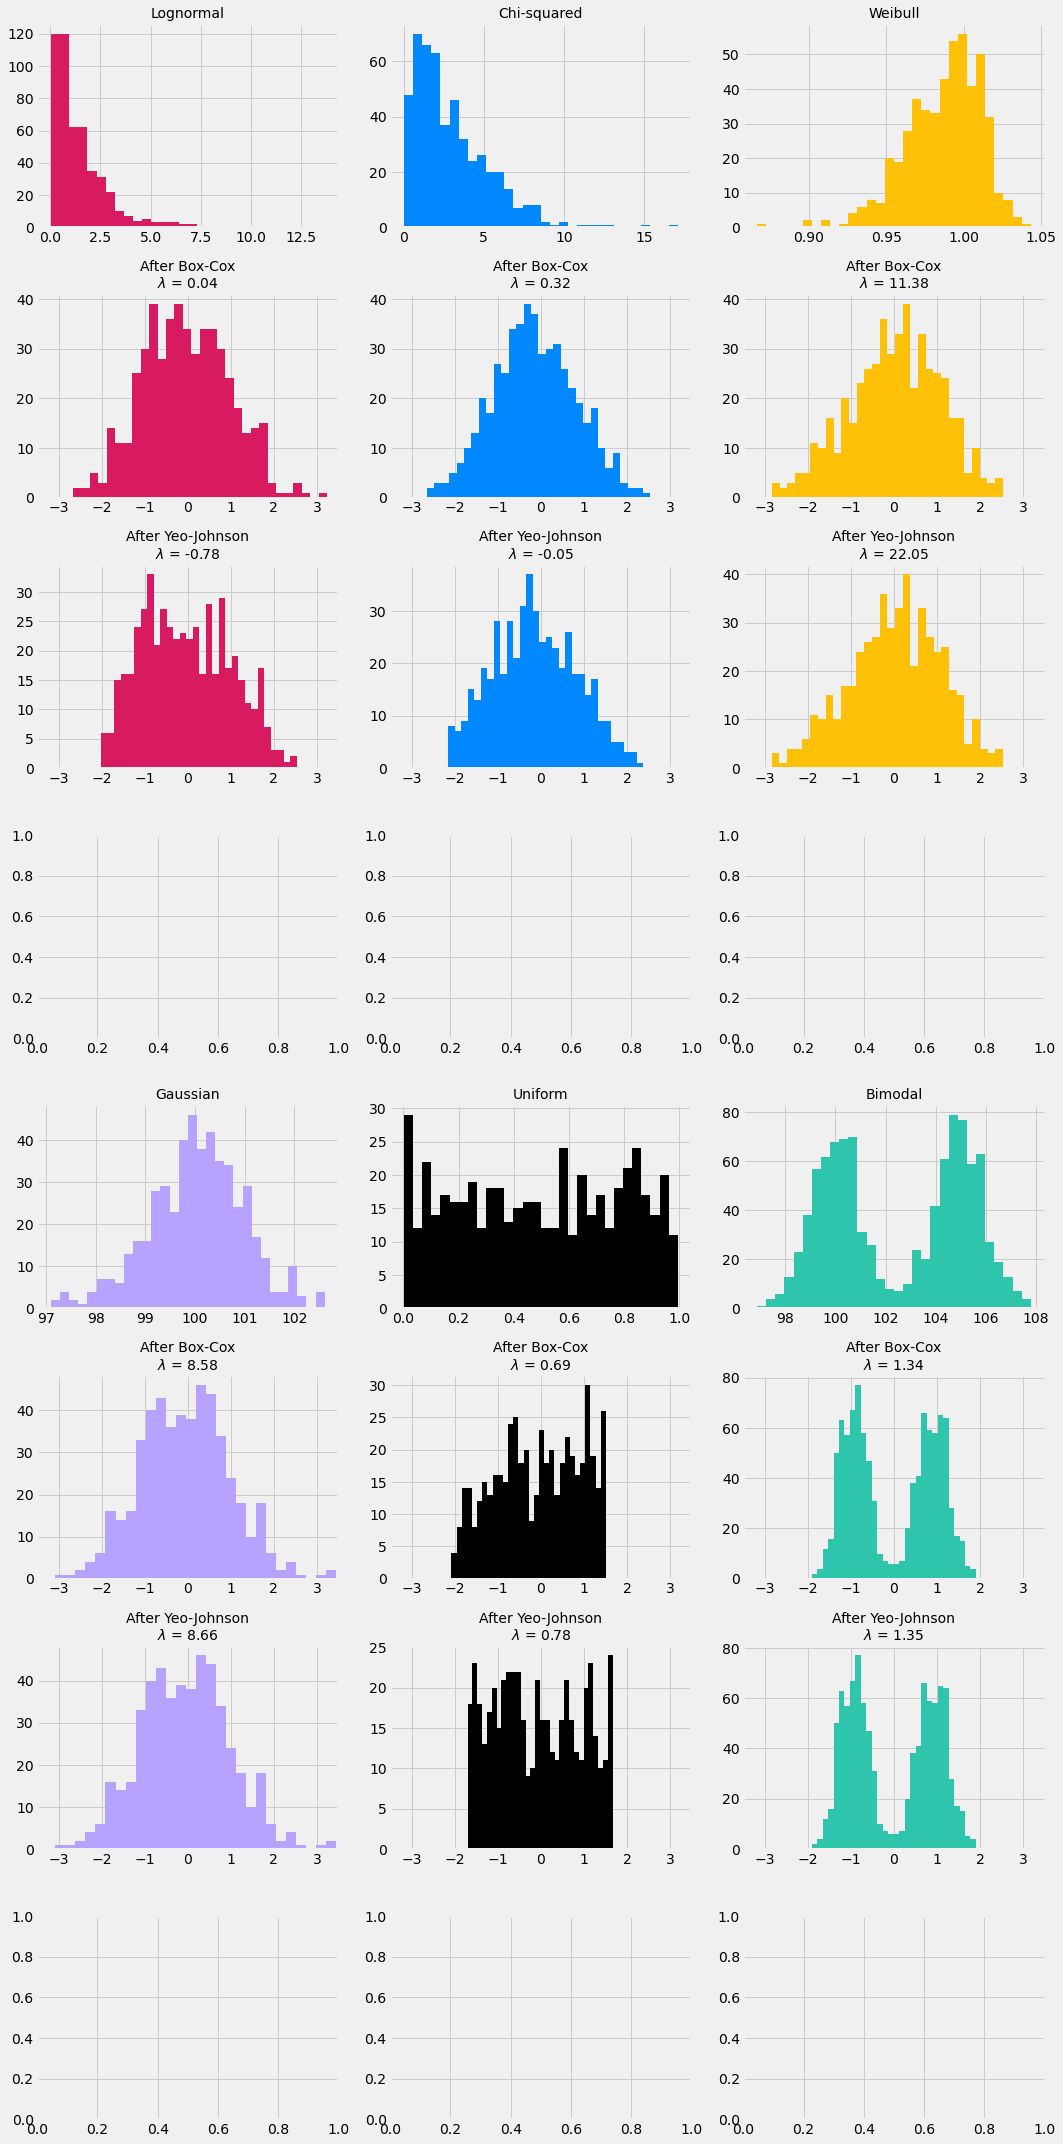

In [34]:
# Author: Eric Chang <ericchang2017@u.northwestern.edu>
#         Nicolas Hug <contact@nicolas-hug.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split


N_SAMPLES = 1000
FONT_SIZE = 14
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15,30))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    # X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj),
        (X_trans_bc, X_trans_yj),
        ("Box-Cox", "Yeo-Johnson"),
        (lmbda_bc, lmbda_yj),
        # (ax_bc, ax_yj, ax_qt),
        # (X_trans_bc, X_trans_yj, X_trans_qt),
        # ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        # (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

# Fonte: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

#### Como utilizar essas classes com o cross-validation?

## Observação

É fácil a gente, sem querer, usar o pré-processamento de dados antes de separar treino e teste, e acabarmos usando dados que não estariam disponíveis na hora da previsão real.

Nós já discutimos extensamente esse problema, porém vale dar nome a ele. O scikit-learn chama isso de __data leakage__ (vazamento de dados). A documentação dele também dá uma regra geral de como evitar esse problema.

<div class="alert alert-block alert-warning">
    Uma causa comum de data leakage é não deixar os conjuntos de treino e teste separados ANTES. Dados de teste nunca devem ser usados para fazer decisões sobre o modelo. <b>A regra geral é nunca usar método "fit" em dados de teste</b>. Enquanto isso pode parecer óbvio, é fácil de deixar passar em alguns casos, por exemplo ao aplicar alguns passos de pré-processamento. 
    <br>
    - Tradução Livre de "Scikit-learn: common pitfalls"
</div>

No curso "Learning from data", isso é chamado de __data snooping__, que consiste do seguinte princípio: 
<div class="alert alert-block alert-warning">
    <b>Se um conjunto de dados afetou qualquer passo no processo de aprendizado, a sua capacidade de avaliar os resultados foi comprometida.</b> 
    <br>
    - Tradução Livre do livro "Learning from data"
</div>



Os pré-processamentos que são mais comuns de a gente cometer data leakage/data snooping:
- StandardScaler
- MinMaxScaler
- SimpleImputer

Uma forma de evitarmos esse tipo de erro é criando um __Pipeline__. Veremos essa classe nas próximas aulas.

## Bibliografia e Aprofundamento dos temas:
- [Scikit-Learn: common pitfalls](https://scikit-learn.org/0.24/common_pitfalls.html)
- [Learning from data](https://work.caltech.edu/telecourse)
- [Efeito dos scalers em vários tipos de distribuição](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
- [Efeito dos scaler nos dados](https://towardsdatascience.com/feature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946)
- [LabelEncoder x OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder)
- [Imputation Strategies Sklearn](https://scikit-learn.org/stable/modules/impute.html)
- [Classes de Preprocessing do Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [Effect of transforming the targets in regression mode](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py)
- [Feature Engineering and Feature Selection](https://www.kaggle.com/code/nkitgupta/feature-engineering-and-feature-selection/notebook)
- [Data Pre-processing](https://medium.com/@patel.rd299/data-science-data-preprocessing-using-data-reduction-techniques-2db69688fb5c)
- [Pre-processing](https://machinelearningmastery.com/data-preparation-techniques-for-machine-learning/)
- [Pre-processing](https://serokell.io/blog/data-preprocessing)

## Exercícios
Utilize o dataset de [preço de venda dos imóveis](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) para treinar as transformações mencionadas em aula. 

Verifique como é a distribuição dos dados de target e ajuste se necessário.


In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="house_prices", as_frame=True, return_X_y=True)